In [243]:
from matplotlib import pyplot as plt 
from matplotlib import image as img
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [244]:
# import original image, get the size of the image
im_original = img.imread('../Resource/sample.JPG')
(x, y, z) =im_original.shape  # Get the width and hight of the image 

In [245]:
# get image data, reshape to list of pixels of RGB
im_data_transformed = im_original.reshape(x * y, z) 
R = im_original[:,:,0]
G = im_original[:,:,1]
B = im_original[:,:,2]

In [247]:
R.shape

(600, 800)

In [286]:
pca = PCA(0.8)

In [287]:
R_lower_dimensional_data = pca.fit_transform(R)

In [288]:
pca.n_components_

13

In [289]:
R_approximation = pca.inverse_transform(R_lower_dimensional_data)

In [290]:
G_lower_dimensional_data = pca.fit_transform(G)

In [291]:
pca.n_components_

14

In [292]:
G_approximation = pca.inverse_transform(G_lower_dimensional_data)

In [293]:
B_lower_dimensional_data = pca.fit_transform(B)

In [294]:
pca.n_components_

7

In [295]:
B_approximation = pca.inverse_transform(B_lower_dimensional_data)

In [296]:
B_approximation.shape

(600, 800)

In [297]:
RGB_approximation = np.stack((np.array(R_approximation), np.array(G_approximation), np.array(B_approximation)),axis = 2)

In [298]:
RGB_approximation.astype("int")

array([[[ 66, 112, 179],
        [ 75, 126, 180],
        [ 73, 125, 179],
        ...,
        [196, 189, 151],
        [195, 188, 157],
        [194, 185, 155]],

       [[ 65, 110, 178],
        [ 75, 127, 178],
        [ 73, 127, 178],
        ...,
        [200, 192, 154],
        [199, 191, 160],
        [199, 188, 158]],

       [[ 60, 107, 176],
        [ 71, 124, 177],
        [ 69, 125, 176],
        ...,
        [205, 195, 156],
        [204, 195, 162],
        [204, 192, 160]],

       ...,

       [[ 20,  24,  43],
        [ 21,  26,  36],
        [ 23,  27,  31],
        ...,
        [ 79,  74,  66],
        [ 50,  45,  49],
        [ 53,  48,  51]],

       [[ 21,  25,  45],
        [ 23,  28,  38],
        [ 25,  29,  33],
        ...,
        [ 81,  75,  66],
        [ 52,  47,  50],
        [ 55,  50,  52]],

       [[ 19,  24,  45],
        [ 22,  27,  39],
        [ 24,  28,  33],
        ...,
        [ 81,  76,  67],
        [ 52,  47,  50],
        [ 55,  50,  52]]

In [299]:
B_approximation

array([[179.98731868, 180.21812089, 179.77064945, ..., 151.84786834,
        157.90843568, 155.72709526],
       [178.51195287, 178.97668715, 178.57876328, ..., 154.34065651,
        160.64215105, 158.7241474 ],
       [176.5131377 , 177.07544786, 176.67567061, ..., 156.13908212,
        162.36388583, 160.76796693],
       ...,
       [ 43.05782728,  36.68349396,  31.44780302, ...,  66.10445395,
         49.61480009,  51.10650717],
       [ 45.10516539,  38.82709123,  33.70960538, ...,  66.96547428,
         50.46436205,  52.01573735],
       [ 45.91302893,  39.24260325,  33.97183244, ...,  67.74410967,
         50.810141  ,  52.44636269]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


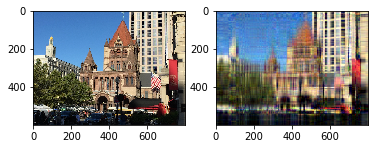

In [300]:
# a comparison of original and compressed
fig, ax = plt.subplots(1,2)
ax[0].imshow(im_original);
ax[1].imshow(RGB_approximation/255);

In [283]:
print(pca.singular_values_)

[39704.60334756 13703.41670902 11132.97380584  7395.61298629
  7224.89783797  6267.62743479  5950.82930085  5411.29658356
  5144.3461095   4667.91331978  4236.14890022  4114.83634404
  3960.69483838  3753.0580141   3547.20271946  3472.47530086
  3294.30975609  3125.91294861  2945.13478948  2896.81191343
  2872.90253218  2758.19525704  2623.59303661  2517.66705531
  2502.33410967  2429.98059658  2389.21821793  2305.30661938
  2258.63940722  2195.79666853  2159.57790312  2106.0088229
  2075.36938545  2030.51573065  2005.65371724  1987.19596031
  1931.42687713  1910.50503901  1854.65781003  1851.90312013
  1802.81327644  1777.78847426  1748.18207711  1706.72377584
  1691.94404412  1673.60837503  1651.8674269   1632.70102241
  1605.09890131  1578.78029166  1563.91225607  1540.78204374
  1528.38927004  1499.92147262  1478.64161842  1471.10653718
  1446.34946115  1435.21649418  1428.86620756  1409.43771556
  1398.42341024  1377.69325342  1370.39900096  1326.51498986
  1324.30100599  1319.711

In [146]:
# select 16 colors to represent all pixels
km = KMeans(
    n_clusters=16, init='random',
    n_init=10, max_iter=100, 
    tol=1e-04, random_state=0
)
km.fit_predict(im_data_transformed)
# km.labels_ as assigments for each pixel, km.clueter_centers_ as selected colors

array([ 1,  1,  1, ...,  7, 14,  0], dtype=int32)

In [147]:
# transform centroids to 255 scale
centroids = (km.cluster_centers_* 255).astype("uint8")

In [148]:
# transform to DataFrames
df_centroids = pd.DataFrame(centroids)

df_pixels = pd.DataFrame(km.labels_)
df_pixels["Index"] = df_pixels.index

In [149]:
# merge two DataFrames, sort by pixel position, select relevant columns
df_combined = df_pixels.merge(df_centroids, how = "inner", left_on = 0, right_index = True )

df_combined_sort = df_combined.sort_values(by = ["Index"])

df_combined_sort_select = df_combined_sort.iloc[:,3:]

In [150]:
# transform back to image shape and save impage
im_compressed = np.reshape(df_combined_sort_select.values,(x,y,z))